In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
personality = pd.read_csv(r"C:\Users\compo1022\Desktop\myapp\personality_dataset.csv")
personality

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [4]:
personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
personality.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [6]:
features_7 = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside',
              'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']

X = personality[features_7]
y = personality["Personality"]

In [7]:
personality["Personality"].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
cat_features = X_train.select_dtypes(include = "object").columns
num_features = X_train.select_dtypes(exclude = "object").columns

In [10]:
cat_features,num_features

(Index(['Stage_fear', 'Drained_after_socializing'], dtype='object'),
 Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
        'Friends_circle_size', 'Post_frequency'],
       dtype='object'))

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [12]:
cat_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "constant",fill_value = "Missing")),
    ("onehotencoder", OneHotEncoder(sparse_output = False,handle_unknown = "ignore")),
])

num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("standardscaler",StandardScaler())
])

transformer = ColumnTransformer([
    ("cat",cat_pipeline,cat_features),
    ("num",num_pipeline,num_features)

])

In [13]:
from sklearn.ensemble import RandomForestClassifier
model_pipeline = Pipeline([
    ("transformer", transformer),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [14]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Stage_fear', 'Drained_after_socializing'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [15]:
model_pipeline.score(X_test,y_test)

0.9224137931034483

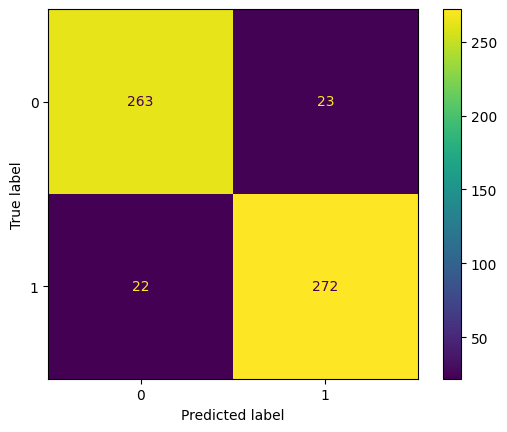

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Extrovert       0.92      0.92      0.92       286
   Introvert       0.92      0.93      0.92       294

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [18]:
import pickle
with open("model_7features.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)

In [19]:
print(X_train.shape[1])


7


In [20]:
with open("model.pkl", "wb") as f:
    pickle.dump(RandomForestClassifier(), f)

with open("transformer.pkl", "wb") as f:
    pickle.dump(transformer, f)

In [22]:
import joblib
joblib.dump(model_pipeline, "model_7features.joblib")


['model_7features.joblib']